In [1]:
using Random, Distributions, Plots, StatsPlots

┌ Info: Recompiling stale cache file /home/gerardo/.julia/compiled/v1.0/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /home/gerardo/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /home/gerardo/.julia/compiled/v1.0/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1190


In [2]:
function metropolis(target, proposal, M, burn_in)
    # Initializing the sample vector
    samples = Vector{Union{Missing,Float64}}(missing,M+burn_in)
    
    # Setting a zeroth sample value
    x = rand(Normal(0,10))
    
    # Anonymous function for transition probability
    dens = (x,y)-> (target(y)/target(x))*(pdf.(proposal(y),x)/pdf.(proposal(x),y))
    
    # Generate M+burn_in samples
    for i = 1:(M+burn_in)
        y = rand(proposal(x))
        
        # Only accept with probability min(1,dens(x,y))
        if rand() < min(1,dens(x,y))# You do realize there's actually no need to obtain the minimum, right?
           x = y
        end
        samples[i] = x
    end
    
    # Return only the samples after burn_in
    return samples[burn_in + 1:M+burn_in]
end

metropolis (generic function with 1 method)

In [3]:
target = x -> pdf.(Exponential(100), x)
proposal = t -> Normal(10,abs(t))

#7 (generic function with 1 method)

In [4]:
samples = metropolis(target, proposal, 10000,1000)

10000-element Array{Union{Missing, Float64},1}:
 216.5225130355768 
 216.5225130355768 
 216.5225130355768 
 216.5225130355768 
 216.5225130355768 
 216.5225130355768 
 216.5225130355768 
 216.5225130355768 
 216.5225130355768 
 216.5225130355768 
 216.5225130355768 
 216.5225130355768 
 216.5225130355768 
   ⋮               
 204.58696718473448
 142.95928041616588
 142.95928041616588
 142.95928041616588
 172.50000100212839
 106.38725219297896
 110.13381217976105
  77.6471481778002 
  77.6471481778002 
  79.17889580418819
  79.17889580418819
  79.17889580418819

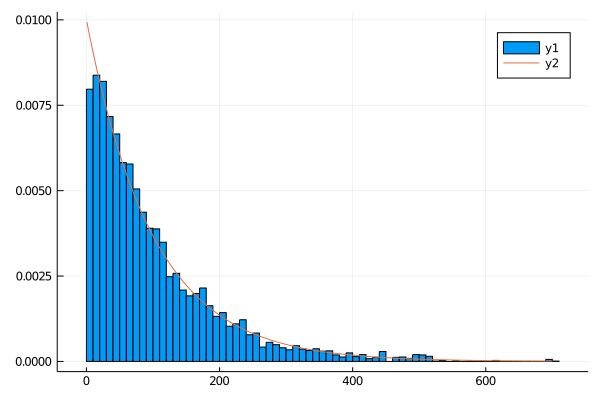

In [5]:
x = range(minimum(samples), length = 300, stop = maximum(samples))
histogram(samples, normed = true)
plot!(x, target)

In [14]:
function target_mv(x)
    rad_2 = x[1]^2/10+x[2]^2/60
    return (rad_2 < 100)*(100-rad_2)
end

proposal_mv = t -> MvNormal(t,[1 0; 0 1])

start = rand(proposal_mv([0,0]))

2-element Array{Float64,1}:
  0.8040335400863954
 -0.8530992720171935

In [15]:
function metropolis_mv(target, proposal, M, burn_in, start)
    # Get the size of the target variable
    dimi = size(start)[1]

    # Initializing the sample vector
    samples = Array{Float64}(undef,dimi,M+burn_in)

    # Setting a zeroth sample value
    x = start

    # Anonymous function for transition probability
    dens = (x,y)-> (target(y)/target(x))*(pdf(proposal(y),x)/pdf(proposal(x),y))

    # Generate M+burn_in samples
    for i = 1:(M+burn_in)
        y = rand(proposal(x))

        # Only accept with probability min(1,dens(x,y))
        if rand() < min(1,dens(x,y))# You do realize there's actually no need to obtain the minimum, right?
           x = y
        end

        samples[:,i] = x
    end

    # Return only the samples after burn_in
    return samples[:,burn_in + 1:M+burn_in]
end


metropolis_mv (generic function with 1 method)

In [18]:
samples_mv = metropolis_mv(target_mv, proposal_mv, 1000000, 10000, start)

2×1000000 Array{Float64,2}:
   4.44933    5.03568    5.28288  …   -9.66849   -9.38934   -9.58624
 -38.6364   -37.8871   -37.4566      -18.6025   -18.8898   -18.3511 

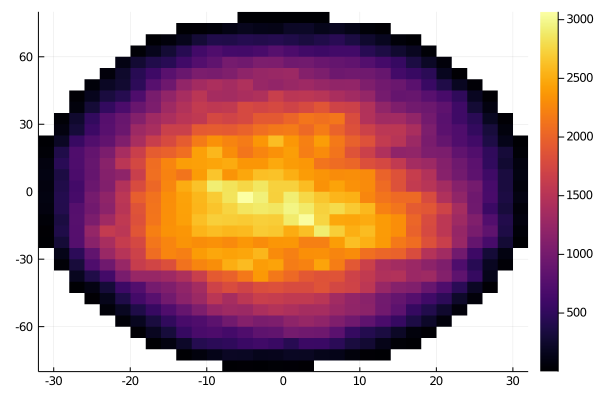

In [19]:
histogram2d(samples_mv[1,:],samples_mv[2,:])